In [78]:
#Libraries Required
import os

import numpy as np  
import pandas as pd 

pd.set_option("display.max_columns", 50)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
 
import datetime
import re
import warnings
warnings.filterwarnings("ignore")

In [79]:
df = pd.read_csv('dataset.csv')

In [80]:
def summary_table(df):
    
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Unique Values'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    
    return summary

## missing data
def missing_values(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False).round(3)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_cols = missing_data[missing_data['Total']>0]
    print(f"Your Dataframe has {df.shape[1]} columns, out of which {missing_cols.shape[0]}")
    missing_data.head(20).style.background_gradient(cmap='Greens') #'Reds'
    return missing_data

## Descriptive Analysis

In [81]:
summary_table(df)

Dataset Shape: (768, 8)


,Name,dtypes,Missing,Unique Values,First Value,Second Value,Third Value
0,Number of times Pregnant,float64,2,18,6.0,1.0,8.0
1,Plasma Concentration,float64,1,137,148.0,85.0,183.0
2,Diastolic BP,float64,4,47,72.0,66.0,64.0
3,Triceps Skin fold thickness,float64,1,51,35.0,29.0,0.0
4,insulin,float64,4,186,0.0,0.0,0.0
5,BMI,float64,3,248,33.6,26.6,23.3
6,Age,float64,2,53,50.0,31.0,32.0
7,Class,int64,0,2,1.0,0.0,1.0


In [82]:
# Descriptive statistics
df.describe().round(1)

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,Class
count,766.0,767.0,764.0,767.0,764.0,765.0,766.0,768.0
mean,3.8,122.1,69.1,20.5,81.0,32.0,33.2,0.3
std,3.4,45.1,19.4,15.9,128.9,7.9,11.9,0.5
min,-13.0,0.0,0.0,0.0,0.0,0.0,-12.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.3,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.5,32.0,29.0,0.0
75%,6.0,141.0,80.0,32.0,126.2,36.6,41.0,1.0
max,17.0,1000.0,122.0,99.0,1846.0,67.1,81.0,1.0


In [83]:
## missing data
missing_values(df)

Your Dataframe has 8 columns, out of which 7


,Total,Percent
Diastolic BP,4,0.005
insulin,4,0.005
BMI,3,0.004
Number of times Pregnant,2,0.003
Age,2,0.003
Plasma Concentration,1,0.001
Triceps Skin fold thickness,1,0.001
Class,0,0.000


**Descriptive Statistics Insights**

- Independent variables - 'Number of times Pregnant', 'Plasma Concentration', 'Diastolic BP’,  'Triceps Skin fold thickness', 'insulin', 'BMI', 'Age’ | Dependent variable – Class

- Number of times Pregnant: The mean value is around 3.8, indicating that on average, women in this dataset have been pregnant about 4 times. However, we see a minimum value of -13, - which is not realistic and indicates an error in the dataset.
- Plasma Concentration: The average glucose concentration is around 122. However, the minimum value is 0, which indicates that the substance being measured is not present or is below the detection limit in the plasma.
- Diastolic BP: The average diastolic blood pressure is around 69. The minimum value is 0, which is not possible and indicates incorrect data.
- Triceps Skin fold thickness: The mean thickness is around 20.5. The minimum value is 0, which indicate that there is no subcutaneous fat present in the triceps area, or it is below the detection limit of the assessment being used.
- Insulin: The average insulin level is around 81. However, the minimum value is 0, which indicates that there is no detectable insulin present in the sample or that the insulin concentration is below the detection limit.
- BMI: The average BMI is around 32. The minimum value is 0, which is not realistic and indicates incorrect data.
- Age: The average age is around 33 years. The minimum value is -12, which is not possible and indicates incorrect data.
- Class: The mean is around 0.35, indicating that about 35% of the women in this dataset have diabetes, and 65% non-diabetic. This is an Imbalance Dataset, hence the ML approach taken SHOULD be fully compatible with imbalanced dataset.

**Missing Value Analysis**
Missing values are negligible in the dataset.


In [84]:
cols_to_fix = list(df.columns)
cols_to_fix.remove("Class")

for col in cols_to_fix:
    if col=='Number of times Pregnant':
        df[col] = df[col].apply(lambda x: x if x >= 0 else np.nan)
    else:
        df[col] = df[col].apply(lambda x: x if x > 0 else np.nan)

After correcting for negative and unrealistic zero values, the updated number of missing values for each column are:

In [85]:
## missing data
missing_values(df)

Your Dataframe has 8 columns, out of which 7


,Total,Percent
insulin,376,0.490
Triceps Skin fold thickness,228,0.297
Diastolic BP,39,0.051
BMI,14,0.018
Plasma Concentration,6,0.008
Number of times Pregnant,3,0.004
Age,3,0.004
Class,0,0.000


The number of missing values has increased, especially for 'Triceps Skin fold thickness' and 'Insulin', indicating that zero values might have been used to fill in for missing values.

The next step is to fill in these missing values. One common strategy is to use the median value of each column. Let's proceed with this strategy. After that, we will explore the distributions of these variables and their correlations.

In [86]:
# Filling the missing values with the median of each column

df.fillna(df.median(), inplace=True)

# Check if there are still missing values
missing_values_filled = df.isnull().sum()
missing_values_filled

Number of times Pregnant       0
Plasma Concentration           0
Diastolic BP                   0
Triceps Skin fold thickness    0
insulin                        0
BMI                            0
Age                            0
Class                          0
dtype: int64

Now, all the missing values have been filled with the median of the respective columns. There are no missing values in the dataset.

Next, let's investigate the distributions of these variables and their correlations. For this, we can use histogram plots to visualize the distributions and a correlation matrix to observe correlations.

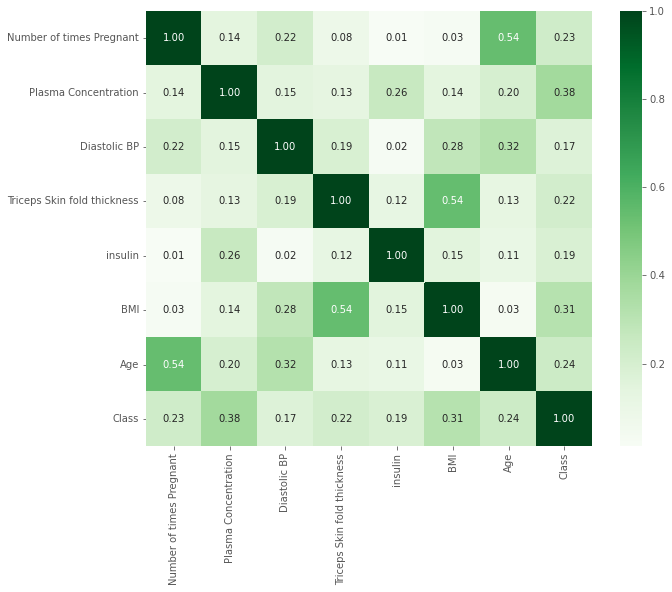

In [87]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.show()

In [88]:
df.to_parquet('imputed_dataset.parquet', index=False)

In [89]:
df.Class.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Class, dtype: float64

In [90]:
df.isnull().sum()

Number of times Pregnant       0
Plasma Concentration           0
Diastolic BP                   0
Triceps Skin fold thickness    0
insulin                        0
BMI                            0
Age                            0
Class                          0
dtype: int64

In [91]:
# df = pd.read_parquet('imputed_dataset.parquet')

# Univariate Analysis

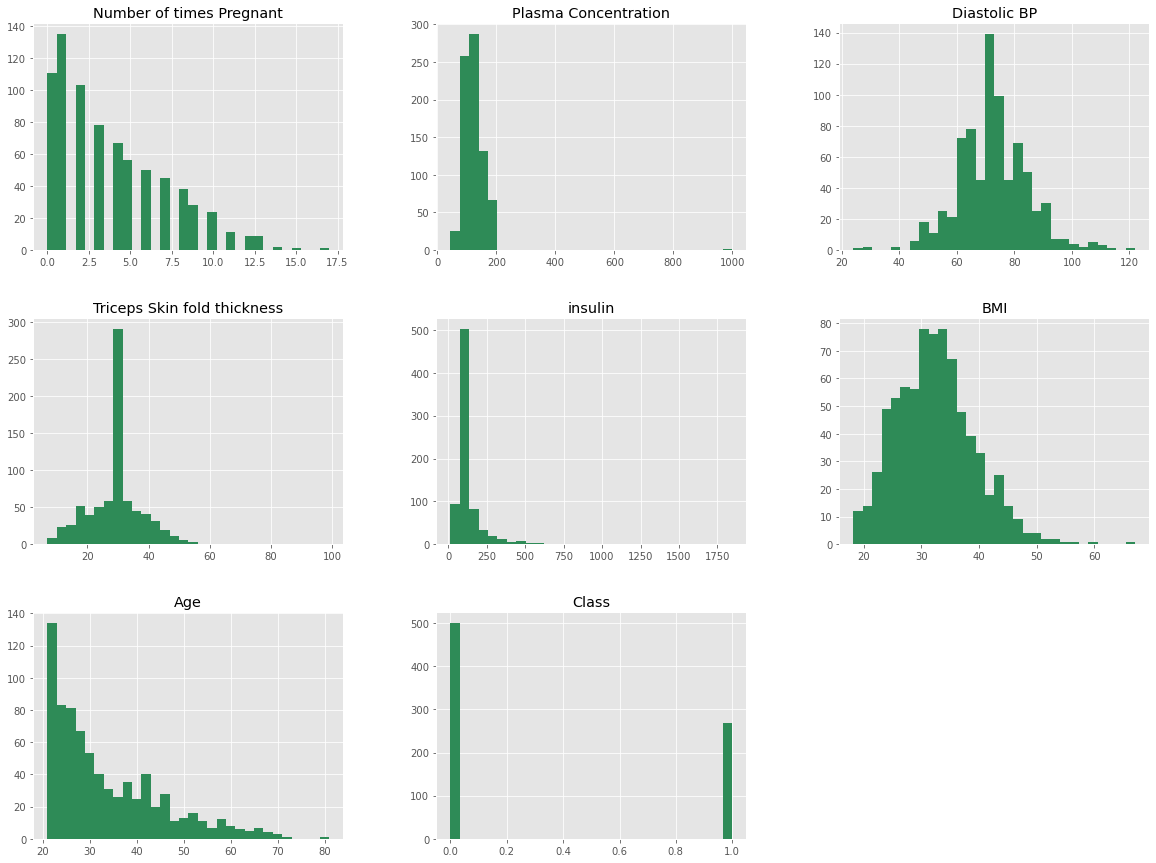

In [92]:
# Histogram plots for each variable
color="seagreen"

df.hist(bins=30, figsize=(20,15), color=color)
plt.show()

From the histogram plots, we can observe the following:

- Number of times Pregnant: Most women have been pregnant less than 5 times, with a significant number never having been pregnant.
- Plasma Concentration: The distribution looks roughly Gaussian (normal), but with a spike at around 120.
- Diastolic BP: The distribution is fairly normal, but with a noticeable spike around 70.
- Triceps Skin fold thickness: Many women have a thickness of around 30.
- Insulin: The majority of women have insulin levels around 30-40, but there's a long tail, indicating a few women with very high levels. 
- BMI: The distribution is roughly normal, with a peak around 30-35.
- Age: Most women are less than 40 years old, with very few older women. 
- Class: The dataset is imbalanced, with more women without diabetes (0) than with diabetes (1).


## 1. Number of times Pregnant

In [93]:
def plot_kde(column):
    ax = df[column].plot(kind='kde',
                          title=column)
    ax.set_xlabel(column)   

Text(0.5, 0, 'Number of times Pregnant')

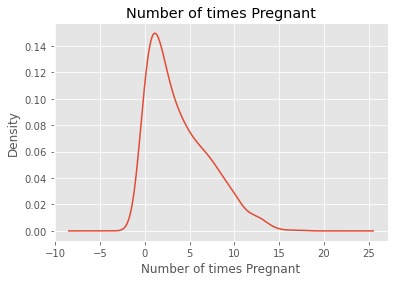

In [94]:
ax = df['Number of times Pregnant'].plot(kind='kde',
                          title='Number of times Pregnant')
ax.set_xlabel('Number of times Pregnant')

<AxesSubplot:xlabel='Number of times Pregnant', ylabel='Number of Women'>

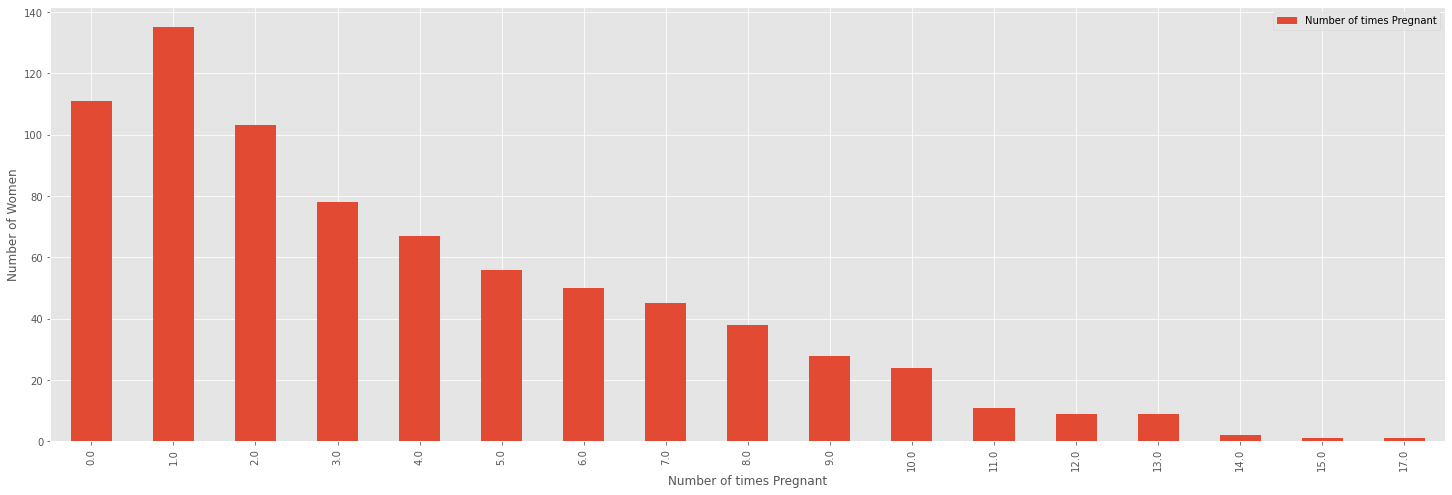

In [95]:
df['Number of times Pregnant'].value_counts().to_frame().sort_index().plot(kind='bar', xlabel='Number of times Pregnant', ylabel= 'Number of Women', figsize=(25,8))

In [96]:
bins_preg = [0, 3, 5, 8, 18]
labels_preg = ['0-3', '3-5', '5-8', '>8']
df['Number_of_times_Pregnant_Stage'] = pd.cut(x = df['Number of times Pregnant'], bins = bins_preg, labels = labels_preg, include_lowest = True)

In [97]:
df_p = df['Number_of_times_Pregnant_Stage'].value_counts().to_frame().reset_index().rename(columns={'index':'Number of times Pregnant', 'Number_of_times_Pregnant_Stage':'count'})
df_p

,Number of times Pregnant,count
0,0-3,427
1,5-8,133
2,3-5,123
3,>8,85


In [98]:
colors = ['skyblue', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=df_p['Number of times Pregnant'], values=df_p['count'])])

fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [99]:
fig = go.Figure(data=[go.Pie(labels=df_p['Number of times Pregnant'], values=df_p['count'], textinfo='label+percent'
                            )])
fig.show()

## 2. Plasma Concentration

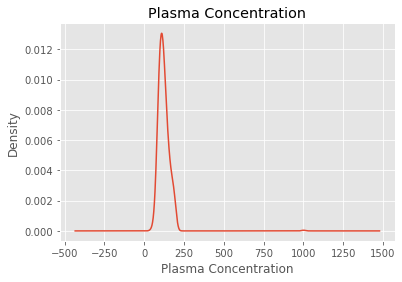

In [100]:
plot_kde('Plasma Concentration')

## 3. Age

In [101]:
bins_age = [20, 30, 40, 60, 90]
labels_age = ['20-30', '30-40', '40-60', '60-90']
df['Age_Stages'] = pd.cut(x = df['Age'], bins = bins_age, labels = labels_age, include_lowest = True)

In [102]:
df_age = df['Age_Stages'].value_counts().to_frame().reset_index().rename(columns={'index':'Age', 'Age_Stages':'count'})
df_age

,Age,count
0,20-30,418
1,40-60,166
2,30-40,157
3,60-90,27


In [103]:
colors = ['skyblue', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=df_age['Age'], values=df_age['count'])])

fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

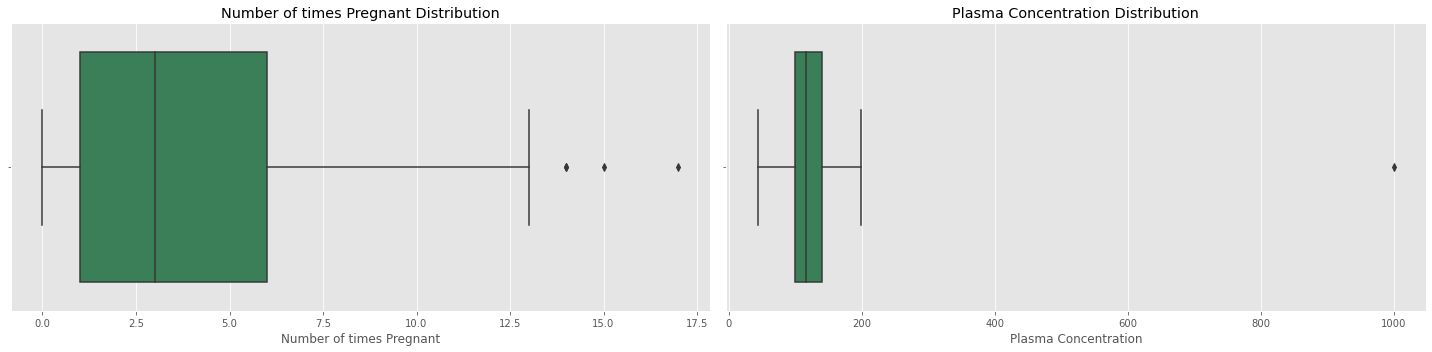

In [104]:
# Create subplots with 1 rows and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(20,5))

# Plot on the first subplot
sns.boxplot(x=df["Number of times Pregnant"], ax=ax[0], color=color)
ax[0].set_title('Number of times Pregnant Distribution')

# Plot on the second subplot
sns.boxplot(x=df["Plasma Concentration"], ax=ax[1], color=color)
ax[1].set_title('Plasma Concentration Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

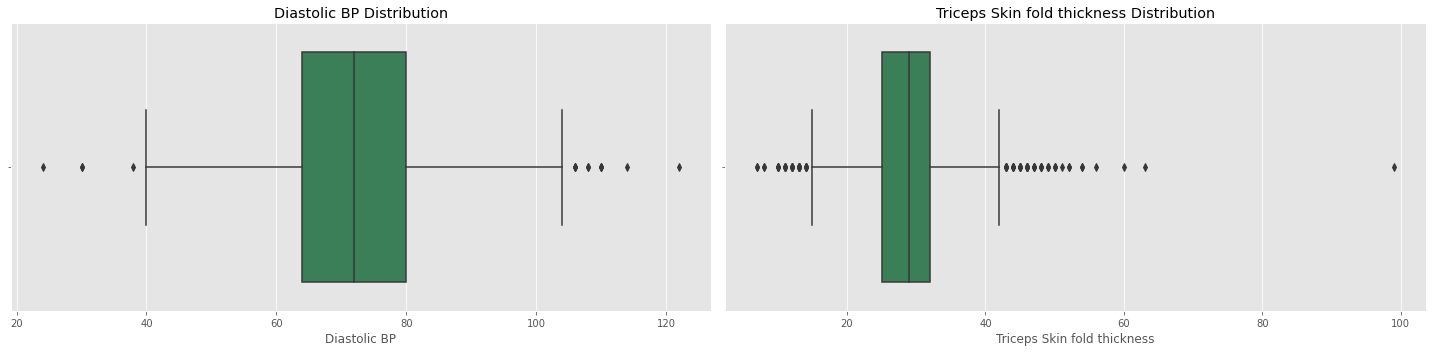

In [105]:
# Create subplots with 1 rows and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(20,5))

# Plot on the first subplot
sns.boxplot(x=df["Diastolic BP"], ax=ax[0], color=color)
ax[0].set_title('Diastolic BP Distribution')

# Plot on the second subplot
sns.boxplot(x=df["Triceps Skin fold thickness"], ax=ax[1], color=color)
ax[1].set_title('Triceps Skin fold thickness Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

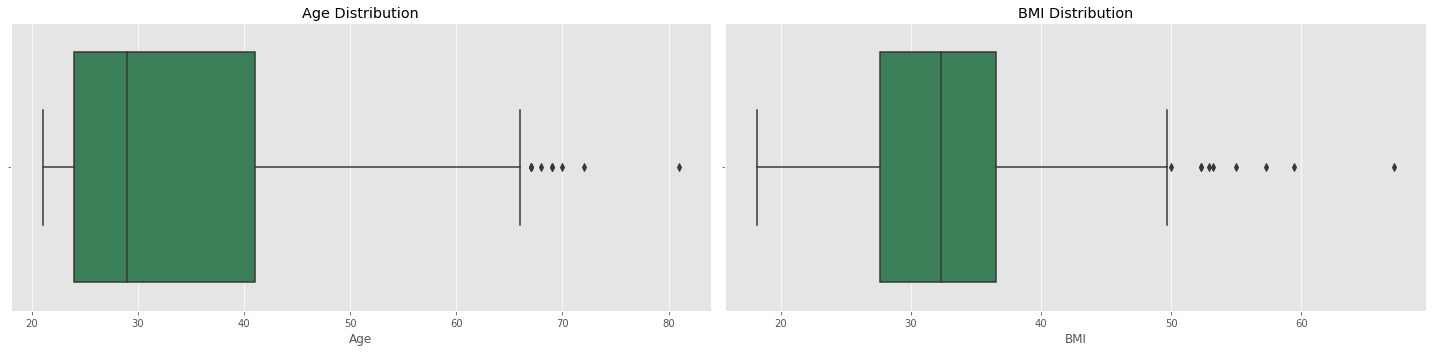

In [107]:
# Create subplots with 1 rows and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(20,5))

# Plot on the first subplot
sns.boxplot(x=df["Age"], ax=ax[0], color=color)
ax[0].set_title('Age Distribution')

# Plot on the second subplot
sns.boxplot(x=df["BMI"], ax=ax[1], color=color)
ax[1].set_title('BMI Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

**Outliers Analysis**

From the box plots, we can observe the following:

- Most of the variables have a presence of outliers. 
- Understand the nature of the outlier: Before taking any action, it's essential to investigate the outlier and understand why it deviates significantly from the rest of the data. Is it - due to measurement errors, data entry mistakes, or is it a legitimate extreme value? Understanding the cause will help determine the appropriate handling method.
- Since we don’t have the above information, we will use algorithms which are ROBUST to outliers.




## 4. Diastolic BP

<AxesSubplot:xlabel='Diastolic BP', ylabel='Number of Women'>

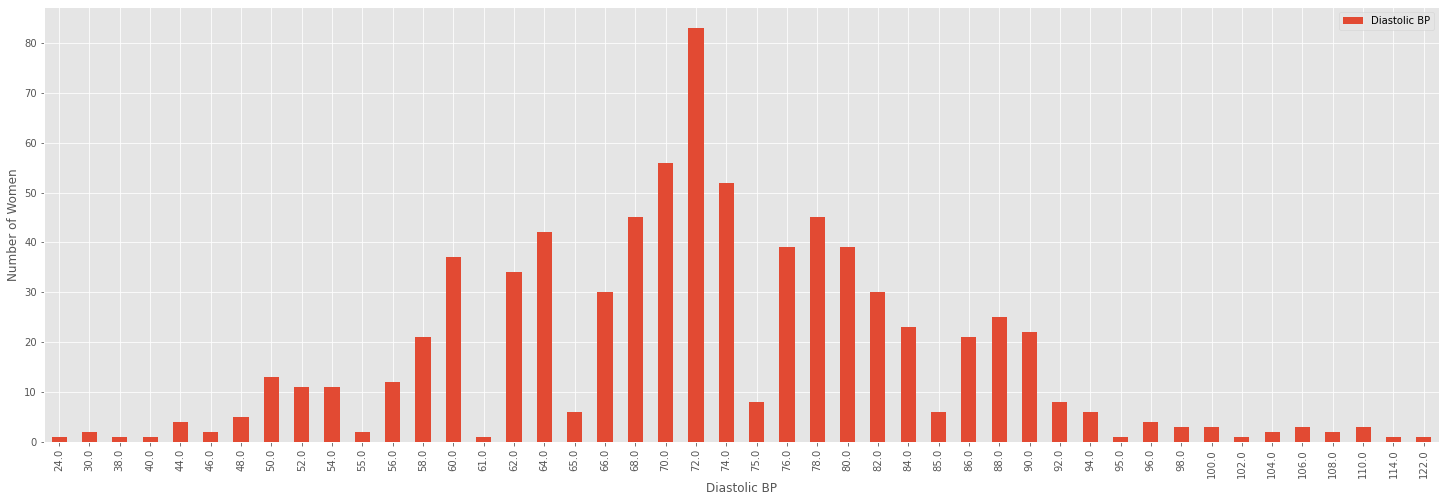

In [108]:
df['Diastolic BP'].value_counts().to_frame().sort_index().plot(kind='bar', xlabel='Diastolic BP', ylabel= 'Number of Women', figsize=(25,8))

In [109]:
bins_dbp = [0, 60, 80, 90, 120, 140]
labels_dbp = ['Very_Low', 'Normal', 'Hypertension_Stage_1', 'Hypertension_Stage_2', 'Hypertension_Crisis']
df['Diastolic_BP_Stage'] = pd.cut(x = df['Diastolic BP'], bins = bins_dbp, labels = labels_dbp, include_lowest = True)

In [110]:
df_dbp = df['Diastolic_BP_Stage'].value_counts().to_frame().reset_index().rename(columns={'index':'Diastolic_BP', 'Diastolic_BP_Stage':'count'})
df_dbp

,Diastolic_BP,count
0,Normal,480
1,Hypertension_Stage_1,127
2,Very_Low,123
3,Hypertension_Stage_2,37
4,Hypertension_Crisis,1


In [111]:
# bins_dbp1 = ['0-60', '60-80', '80-90', '90-120', '120-140']

# d = pd.concat([pd.Series(bins_dbp1), df_dbp], axis=1)
# d.rename(columns={0: 'Diastolic_BP_range'}, inplace=True)

In [112]:
colors = ['skyblue', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=df_dbp['Diastolic_BP'], values=df_dbp['count'])])

fig.update_traces(hoverinfo='label+percent', textinfo='label+value', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [113]:
fig = go.Figure(data=[go.Pie(labels=df_dbp['Diastolic_BP'], values=df_dbp['count'], textinfo='label+percent'
                            )])
fig.show()

# Bi-variate Analysis

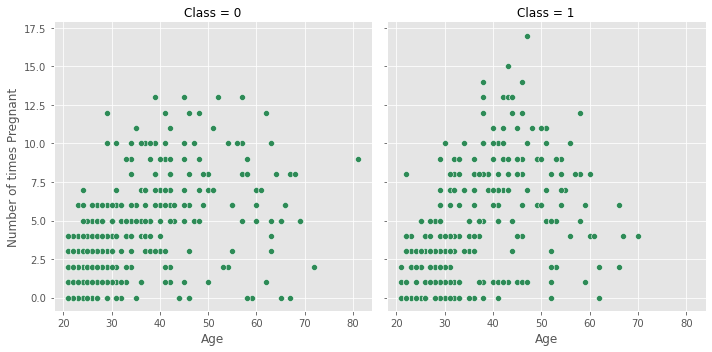

In [114]:
g = sns.relplot(data=df, x="Age", y="Number of times Pregnant", col="Class", color=color)
g.set_axis_labels("Age", "Number of times Pregnant")

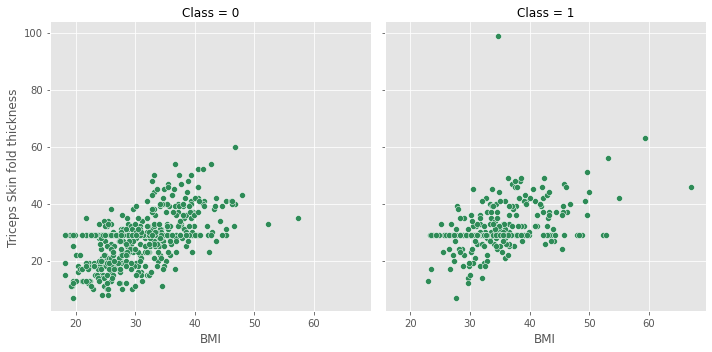

In [115]:
g = sns.relplot(data=df, x="BMI", y="Triceps Skin fold thickness", col="Class", color=color)
g.set_axis_labels("BMI", "Triceps Skin fold thickness")

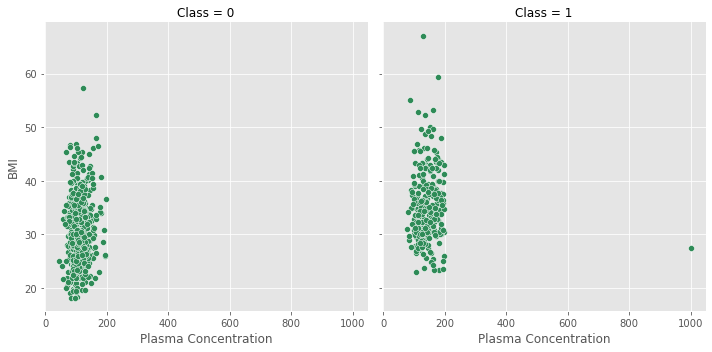

In [116]:
g = sns.relplot(data=df, x="Plasma Concentration", y="BMI", col="Class", color=color)
g.set_axis_labels("Plasma Concentration", "BMI")

In reference with Correlation Heatmap, we had the most correlation among below - 

- Age vs Number of pregnancies - There is a relationship between age and the number of pregnancies a women had, specifically in the context of gestational diabetes mellitus (GDM). Gestational diabetes is a type of diabetes that occurs during pregnancy and typically resolves after delivery. It is characterized by high blood sugar levels that develop or are first recognized during pregnancy.
- BMI vs Triceps skinfold thickness - The relationship between body mass index (BMI) and Triceps skinfold thickness can provide insights into how body weight is distributed, particularly the amount of subcutaneous fat. Individuals with higher BMI values and increased triceps skinfold thickness may have a greater proportion of body fat, thereby an increased risk of diabetes. 
- Plasma Concentration vs BMI - Diabetes has a significant impact on plasma concentration levels of various substances, particularly glucose and insulin, it causes a dysregulation of blood glucose levels. 



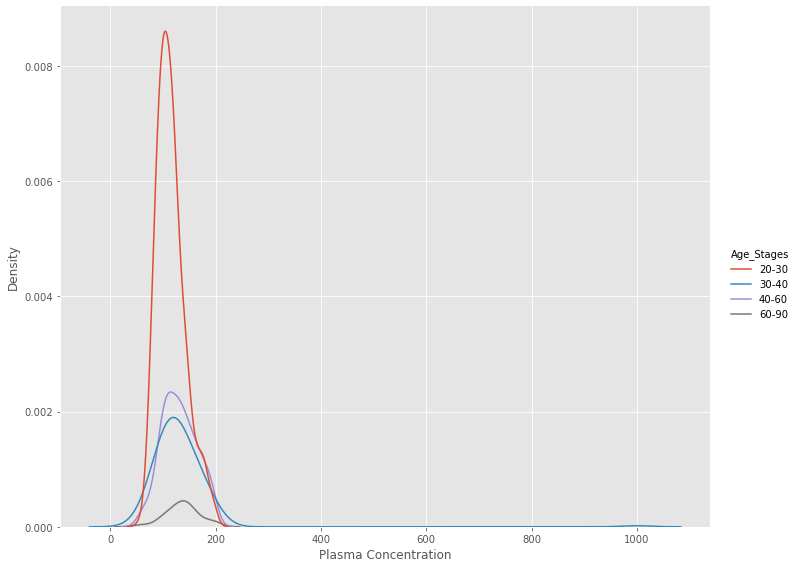

In [117]:
sns.displot(df, x="Plasma Concentration", hue="Age_Stages", kind="kde", height=8, aspect=20.7/16.27)

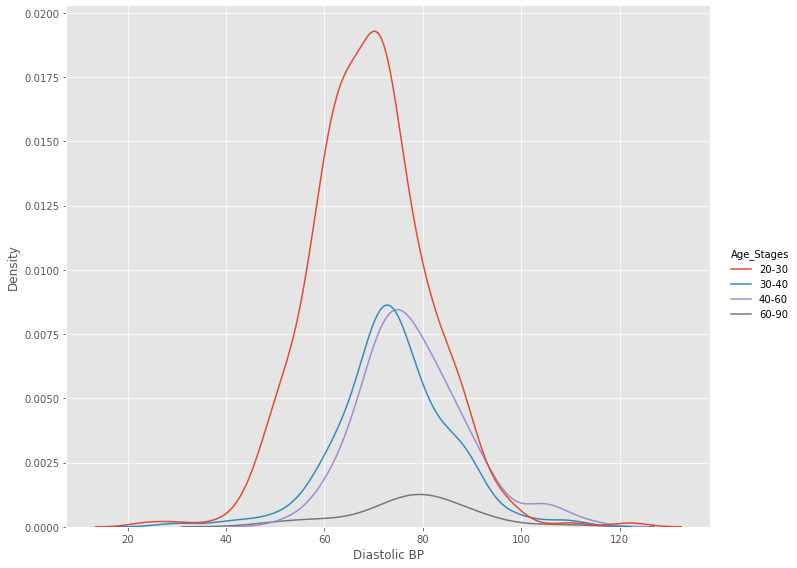

In [118]:
sns.displot(df, x="Diastolic BP", hue="Age_Stages", kind="kde", height=8, aspect=20.7/16.27)

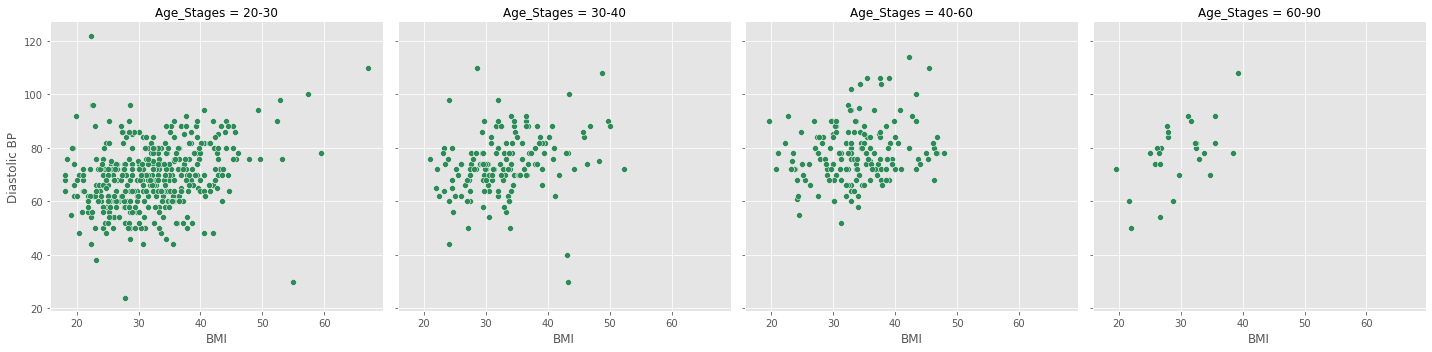

In [119]:
g = sns.relplot(data=df, x="BMI", y="Diastolic BP", col="Age_Stages", color=color)
g.set_axis_labels("BMI", "Diastolic BP")

Text(0.5, 0.98, 'Plasma Concentration across Pregnancy')

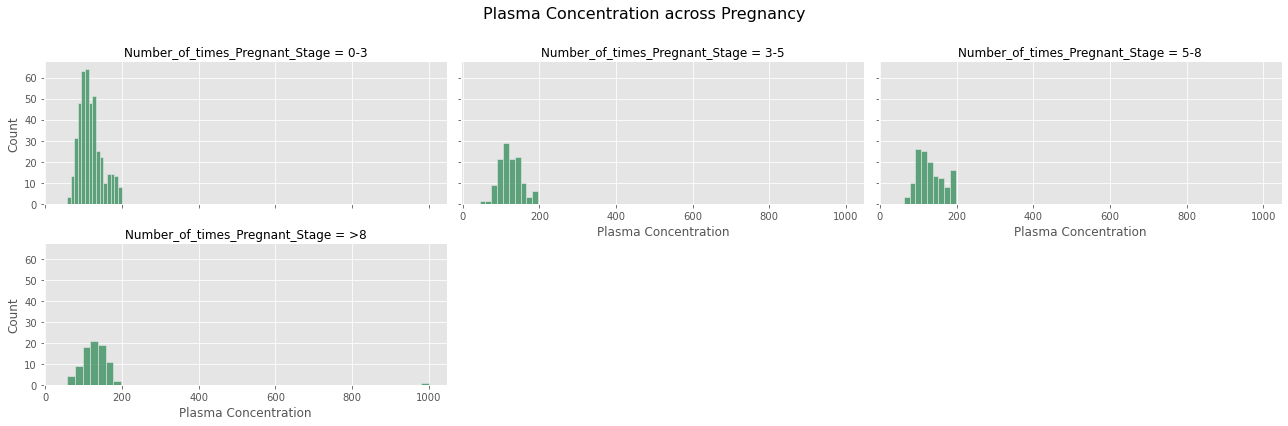

In [120]:
g = sns.FacetGrid(df, col="Number_of_times_Pregnant_Stage", aspect=2, col_wrap=3)
g.map_dataframe(sns.histplot, x="Plasma Concentration", color=color)

g.fig.subplots_adjust(top=0.85) # adjust the Figure in g
g.fig.suptitle('Plasma Concentration across Pregnancy', fontsize=16)

Text(0.5, 0.98, 'Plasma Concentration across Diastolic_BP_Stage')

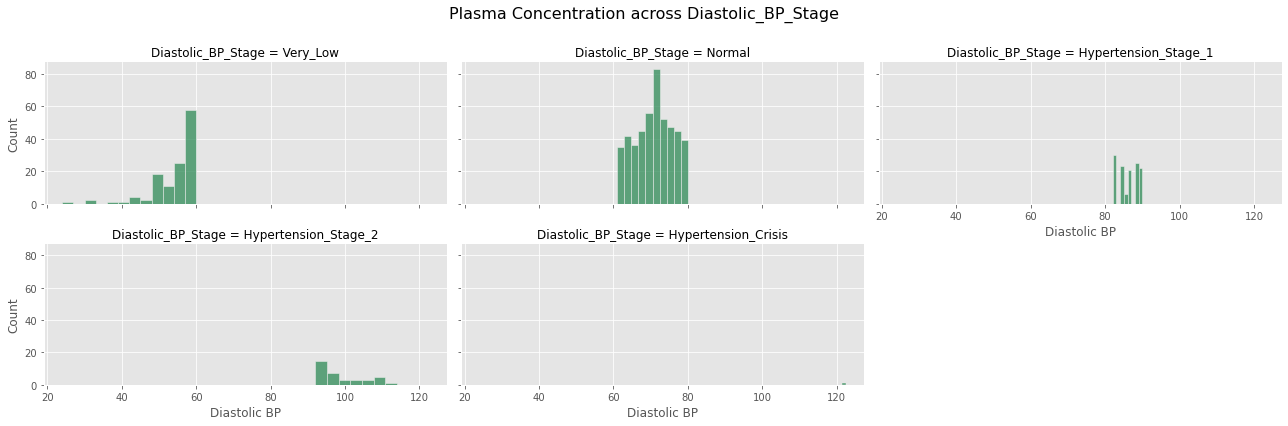

In [121]:
g = sns.FacetGrid(df, col="Diastolic_BP_Stage", aspect=2, col_wrap=3)
g.map_dataframe(sns.histplot, x="Diastolic BP", color=color)

g.fig.subplots_adjust(top=0.85) # adjust the Figure in g
g.fig.suptitle('Plasma Concentration across Diastolic_BP_Stage', fontsize=16)

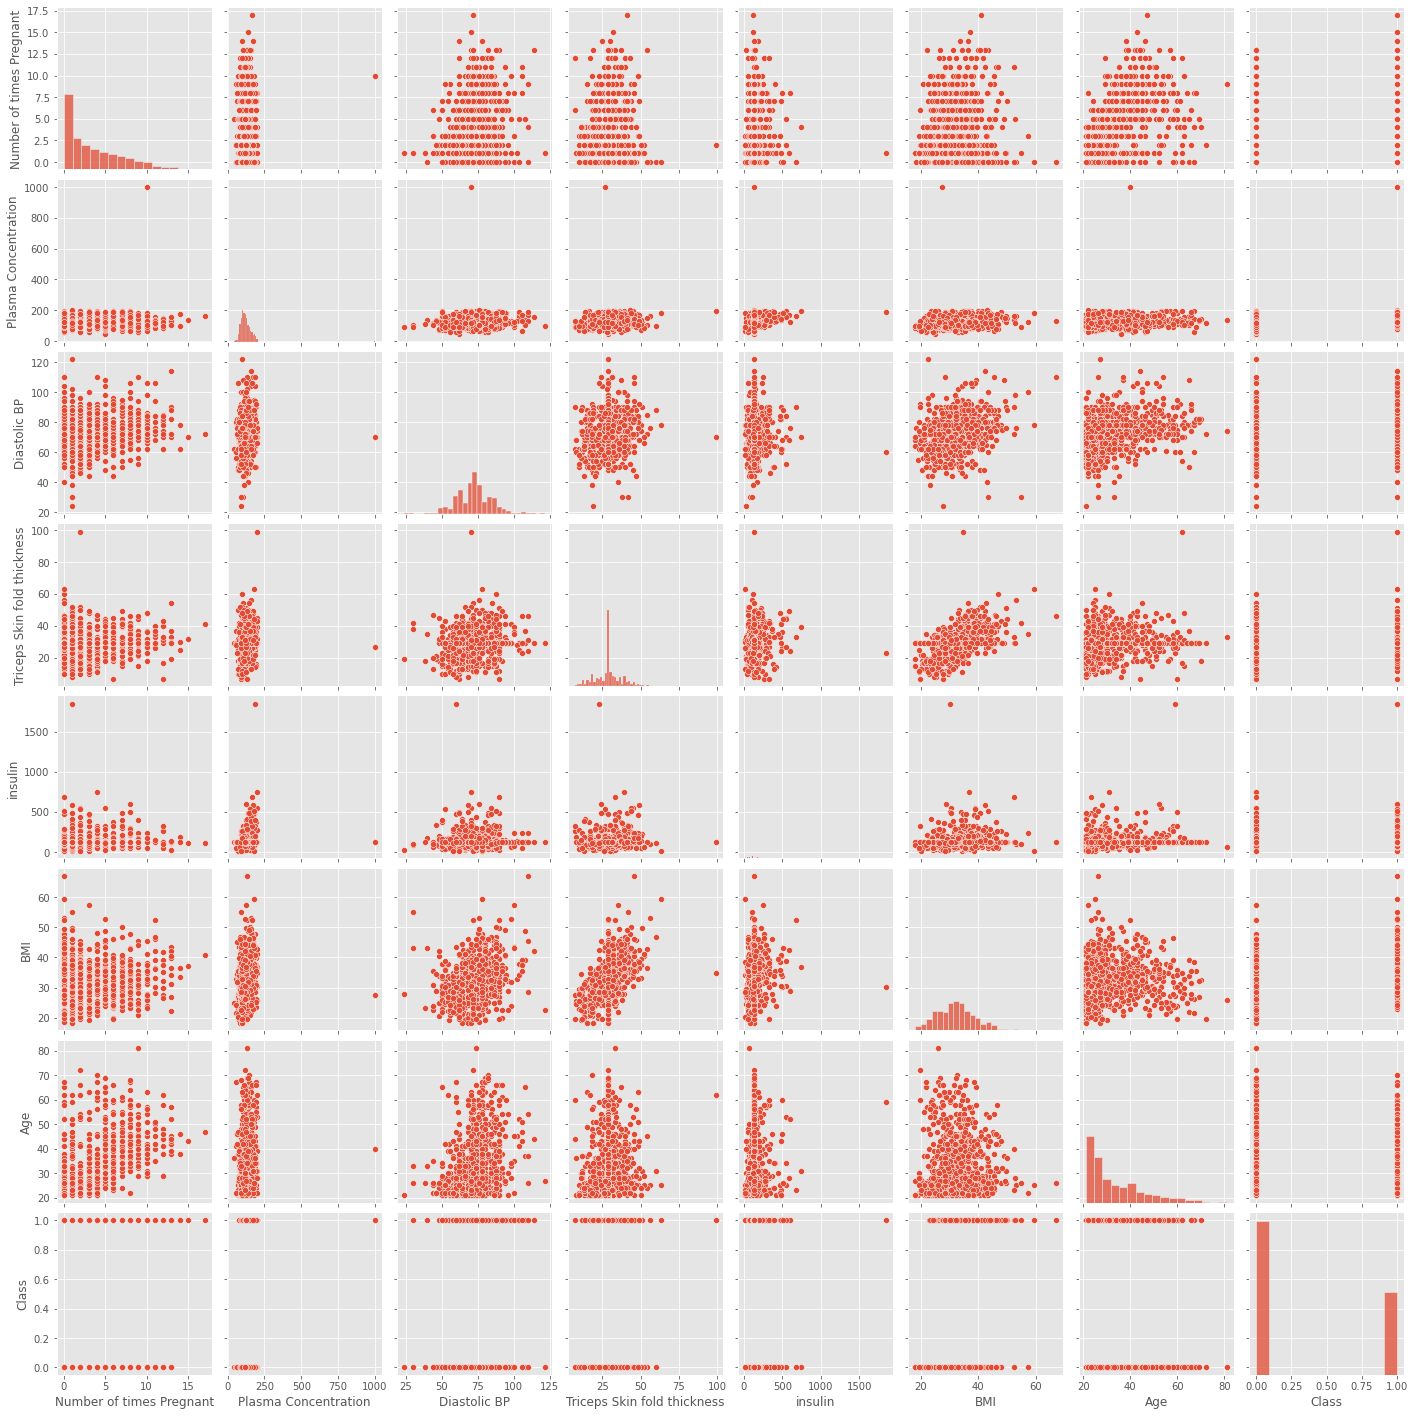

In [122]:
sns.pairplot(data=df)

# Target  Analysis

Text(0.5, 0.98, 'Plasma Concentration across Diabities')

<Figure size 360x1080 with 0 Axes>

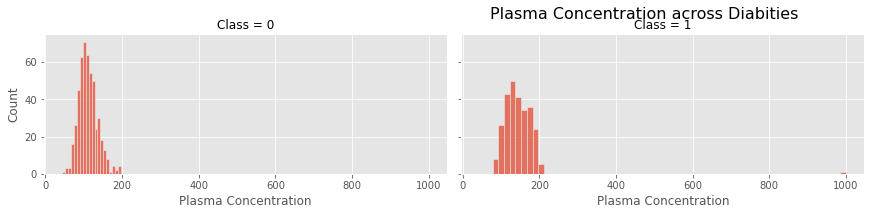

In [124]:
plt.figure(figsize=(5,15))

g = sns.FacetGrid(df, col="Class", aspect=2, col_wrap=3)
g.map_dataframe(sns.histplot, x="Plasma Concentration")

g.fig.subplots_adjust(top=0.85) # adjust the Figure in g
g.fig.suptitle('Plasma Concentration across Diabities', fontsize=16)

In [126]:
class_age = (pd.crosstab(index=df['Class'],
             columns=df['Age_Stages'],
             values=df['Age'],
             aggfunc='count',
             normalize='index').round(3))*100

class_age = class_age.unstack().unstack().reset_index()
class_age

Class,Age_Stages,0,1
0,20-30,65.6,33.6
1,30-40,16.2,28.4
2,40-60,14.2,35.4
3,60-90,4.0,2.6


In [127]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = class_age['Age_Stages']
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=class_age[0], name="No Diabities"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=class_age[1], name="Diabities"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Diabities Distribution across Age Groups",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='No Diabities', x=0.19, y=0.5, font_size=15, showarrow=False),
                 dict(text='Diabities', x=0.8, y=0.5, font_size=15, showarrow=False)])
fig.show()

In [128]:
class_pregnancy = (pd.crosstab(index=df['Class'],
             columns=df['Number_of_times_Pregnant_Stage'],
             values=df['Number of times Pregnant'],
             aggfunc='count',
             normalize='index').round(3))*100

class_pregnancy = class_pregnancy.unstack().unstack().reset_index()
class_pregnancy

Class,Number_of_times_Pregnant_Stage,0,1
0,0-3,62.6,42.5
1,3-5,16.0,16.0
2,5-8,14.0,23.5
3,>8,7.4,17.9


In [129]:
labels = class_pregnancy['Number_of_times_Pregnant_Stage']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=class_pregnancy[0], name="No Diabities"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=class_pregnancy[1], name="Diabities"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Diabities Distribution across Number of times Pregnant",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='No Diabities', x=0.19, y=0.5, font_size=15, showarrow=False),
                 dict(text='Diabities', x=0.8, y=0.5, font_size=15, showarrow=False)])
fig.show()

# END